##### 滤波代码

In [33]:
# 滤波代码
import pywt
from scipy import signal
# import matplotlib.pyplot as plt

def Wavelet_transform(ECG_Q):
    w = pywt.Wavelet('db8') # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(ECG_Q), w.dec_len)
    threshold = 0.1 # Threshold for filtering
    coeffs = pywt.wavedec(ECG_Q,'db8', level=maxlev) # 将信号进行小波分解
    #这里就是对每一层的coffe进行更改
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i])) 
    datarec = pywt.waverec(coeffs, 'db8') # 将信号进行小波重构
    return datarec

def butter_fliter(data, frequency, highpass, lowpass):
    [b, a] = signal.butter(3, [lowpass / frequency * 2, highpass / frequency * 2], 'bandpass')
    Signal_pro = signal.filtfilt(b, a, data)
    return Signal_pro


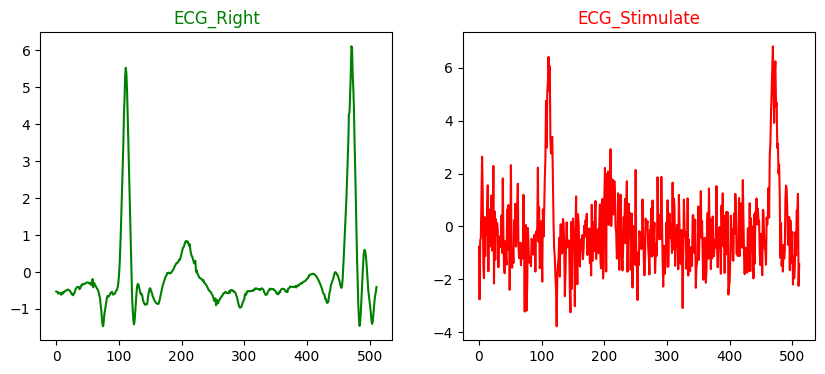

' 这里有好多个ECG变量,在此做个说明,\n    ECG_01是读出硬件给过来的数据集,ECG_02是把ECG_01从一维转化为二维,\n    ECG_03是把ECG_02塑造成想训练的形状,ECG_04是对ECG_03进行滤波,\n    ECG_05则是对数组进行标准化,注:其实完全可以在读进文件后就进行滤波操作,这样反而能省事,\n    不过写都写了,后续有需要的话再做更改吧'

In [87]:
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# 标准化
def standscaler_demo(date):
    transfer = StandardScaler()
    date1 = transfer.fit_transform(date)
    return date1

# 数据读进来处理的封装函数
def ECG_process(ECG_01):
    ECG_02 = np.array(ECG_01).reshape(-1,1)[:102400]
    ECG_03 = ECG_02.reshape(-1,512)
    ECG_04 = np.zeros(ECG_03.shape)
    for line in range(0,ECG_03.shape[0]):
        ECG_04[line] = Wavelet_transform(ECG_03[line])
    ECG_05 = standscaler_demo(ECG_04)
    return ECG_04,ECG_05   # 返回值为两个数组

ECG_01 = pd.read_csv("../Datasets/training_data.csv")["x"] # 训练集数据
ECG_04,ECG_05 = ECG_process(ECG_01)

# 模拟非正常心电
ECG_stimulate = np.random.normal(0,1,ECG_05.shape)
ECG_stimulate += ECG_05 # 之前是一团,现在是一个心电的形状
# eg.
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("ECG_Right",color="g")
plt.plot(ECG_05[0][:512], color='g') 
plt.subplot(1,2,2)
plt.title("ECG_Stimulate",color="r")
plt.plot(ECG_stimulate[0][:512], color='r')
plt.show()

''' 这里有好多个ECG变量,在此做个说明,
    ECG_01是读出硬件给过来的数据集,ECG_02是把ECG_01从一维转化为二维,
    ECG_03是把ECG_02塑造成想训练的形状,ECG_04是对ECG_03进行滤波,
    ECG_05则是对数组进行标准化,注:其实完全可以在读进文件后就进行滤波操作,这样反而能省事,
    不过写都写了,后续有需要的话再做更改吧'''

In [89]:
#  构建数据集
true_list = [1] * 200
print("正确标签值列表", true_list)
error_list = [0] * 200
print("错误标签值列表", error_list )
for i in error_list:
    true_list.append(i)
target_list = true_list
print("目标值向量是：\n",target_list)

#  合并两个训练集为ndarray类型的数据
np_train = np.vstack((ECG_05,ECG_stimulate))
print("\n训练集ndarry格式的数据为:\n", np_train)

正确标签值列表 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
错误标签值列表 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [90]:
#  进行数据分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np_train, target_list, test_size=0.2)

print("\n分割后用来训练的特征值是:\n", x_train)
print("\n分割后用来测试的特征值是:\n", x_test)
print("\n分割后用来训练的目标值是:\n", y_train)
print("\n分割后用来测试的目标值是:\n", y_test)


分割后用来训练的特征值是:
 [[-0.29734669 -0.29091043 -0.28770134 ... -0.58728078 -0.56403185
  -0.55722577]
 [ 5.33846173  5.79542958  4.1505868  ...  0.74758976  1.72202213
  -0.1387543 ]
 [-1.40640956  0.21128009 -1.1735219  ... -2.10114599 -0.34968934
  -1.00062748]
 ...
 [-0.36989419 -0.37086601 -0.37320079 ... -0.38404172 -0.39557383
  -0.3954859 ]
 [ 0.52376741 -0.81945178 -1.92223141 ... -0.39885991  1.83972548
   0.6621923 ]
 [-1.01321408 -0.65445074 -2.29305023 ...  0.91746727  0.89353817
   0.67621333]]

分割后用来测试的特征值是:
 [[ 0.53124863 -1.42062525 -0.09799208 ... -0.02123934 -0.50557642
  -1.14677501]
 [ 1.02774134  1.40533656  0.4363293  ...  0.47057009  0.62463678
  -1.33203744]
 [ 0.27437609  0.28350361  0.27365903 ... -0.41880307 -0.34430261
  -0.36452735]
 ...
 [-0.31781846 -0.28260117 -0.32197381 ...  0.35280667  0.31821535
   0.29828609]
 [-0.96810325  2.73056845  0.01780708 ...  0.69733229 -1.32395146
  -1.78999538]
 [-0.55525186  0.61958189  1.56078287 ... -0.97349936 -2.47814414


In [92]:
# 向量机
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import pickle

estimator = SVC(random_state=6)
Svc_train = estimator.fit(x_train, y_train)
svc_tra = estimator.score(x_test, y_test)

# 模型保存
with open ("II. Classification(SVC).pickle","wb") as f:
    pickle.dump(Svc_train,f) #将训练好的模型svc_tra存储在变量f中，且保存到本地

# 模型的加载和使用
with open("II. Classification(SVC).pickle","rb") as f:
    SVM_load = pickle.load(f)

y_pre_svc = estimator.predict(x_test)
roc_svc_score = roc_auc_score(y_test, y_pre_svc)
svc_tre = estimator.score(x_test, y_test)
print("向量机的预测值是：\n", y_pre_svc)
print("实际值是:\n", y_test)
print("准确率是：\n", svc_tre)
print("auc指标是:\n",roc_svc_score) 
# II. Classification

向量机的预测值是：
 [0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 0 1 0 0]
实际值是:
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
准确率是：
 0.9375
auc指标是:
 0.938398999374609


[0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


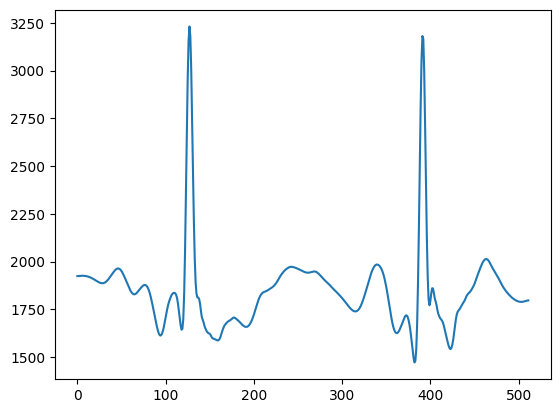

In [104]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier

# 标准化
def standscaler_demo(date):
    transfer = StandardScaler()
    date1 = transfer.fit_transform(date)
    return date1

def ECG_process(ECG_01):
    ECG_02 = np.array(ECG_01).reshape(-1,512)  #.reshape(-1,1)[0:ECG_01.shape[0] - ECG_01.shape[0]%1024]
    ECG_03 = ECG_02.reshape(-1,512)
    ECG_04 = np.zeros(ECG_03.shape)
    for line in range(0,ECG_03.shape[0]):
        ECG_04[line] = Wavelet_transform(ECG_03[line])
    ECG_05 = standscaler_demo(ECG_04)
    return ECG_04,ECG_05  # 用python的拆包将滤波后的数组与进行标准化的数组分别返回

# 模型的加载和使用
with open("II. Classification(SVC).pickle","rb") as f:
    SVM_load = pickle.load(f)

test_ECG = pd.read_csv("../Datasets/1111ECG20230409165336.csv",header=None)
ECG_04,ECG_05 = ECG_process(test_ECG)
print(SVM_load.predict(ECG_05))


predict_array = SVM_load.predict(ECG_05)
plt.plot(ECG_04[7])
plt.show()



In [108]:
# # 删掉不符合规范的心电行数

# len_ECG = ECG_process(test_ECG)[0].shape[1]
# signal = ECG_process(test_ECG)[0]
# signal
# for i in range(0,predict_array.shape[0]):
#     if predict_array[i] == 0:
#         signal = np.delete(signal,i,axis=0)
#         # print(predict_array[i])
# # signal
# signal_flatten = signal.flatten()
# signal_flatten  #代码有缺陷，易出现前后数量不够所要截取的长度

# 拉长，有利于R峰的提取
signal_flatten = ECG_04.flatten()
for i in range(0,predict_array.shape[0]):
    if predict_array[i] == 0:


(16,)

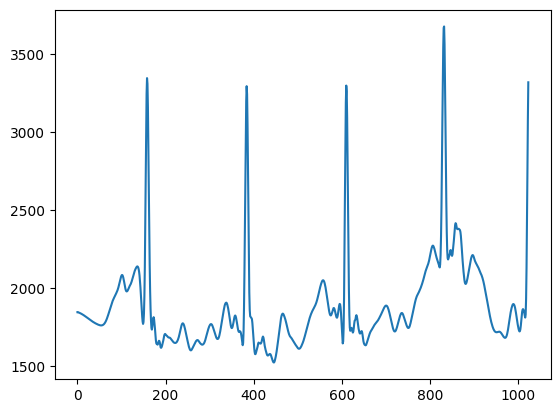

In [17]:
plt.plot(signal[5])
plt.show()

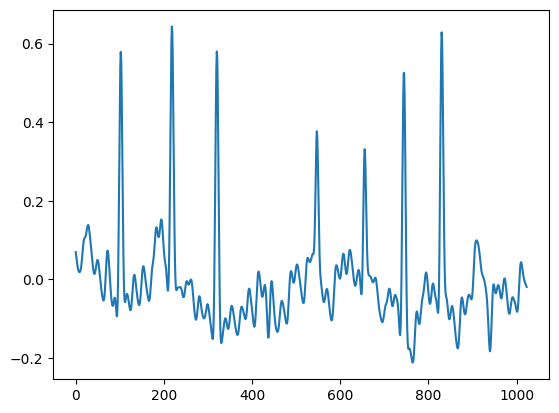

In [61]:
# 进行下采样1024个点到720
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

data = pd.read_csv('d:/下载/1111ECG20230409165414.csv',header=None).to_numpy().reshape((-1,1024))
def resample_mapping(data):
    # 将本地数据等比映射到MIT数据集
    data1 = data / 4096 * 1.6 - 0.6
    resample_array = np.ones([8,720])
    count = 0
    for i in data1:
        # resample_list.append(scipy.signal.resample(i, 717, t=None, axis=0, window=None))
        resample_array[count] =  signal.resample(i, 720, t=None, axis=0, window=None)
        count += 1
    # data2 = butter_fliter(data1,frequency=360,highpass=40,lowpass=0.1)
    # plt.plot(singnal_fliter(resample_array[2]))
    # plt.plot(data[2])
    # plt.show()
    # singnal_fliter
    # resample_array_filter = np.array(resample_array.shape)
    # for i in range(0,resample_array.shape[0]):
    #     resample_array_filter[i] = butter_fliter(resample_array[i],frequency=360,highpass=40,lowpass=0.1)
    return resample_array
resample_array = resample_mapping(data)
# plt.plot(resample_mapping(data)[0])
resample_array
plt.plot(resample_array[2])